In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
time = pd.read_csv('hdb.csv')

In [3]:
time.info()
rsp = time[["resale_price"]]
month = pd.DataFrame(time[["month"]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           826581 non-null  int64  
 1   month                826581 non-null  object 
 2   town                 826581 non-null  object 
 3   flat_type            826581 non-null  object 
 4   block                826581 non-null  object 
 5   floor_area_sqm       826581 non-null  float64
 6   flat_model           826581 non-null  object 
 7   lease_commence_date  826581 non-null  int64  
 8   resale_price         826581 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 56.8+ MB


In [4]:
for x in month:
        month[x] = month[x].str[:4]
month = month.astype(str).astype(int)
time["month"] = month
time = time.assign(lease= time['month']- time['lease_commence_date'])

In [5]:
time = time.assign(lease = 99 - (time['month']- time['lease_commence_date']))

In [6]:
lease = time[["lease"]]


<AxesSubplot:>

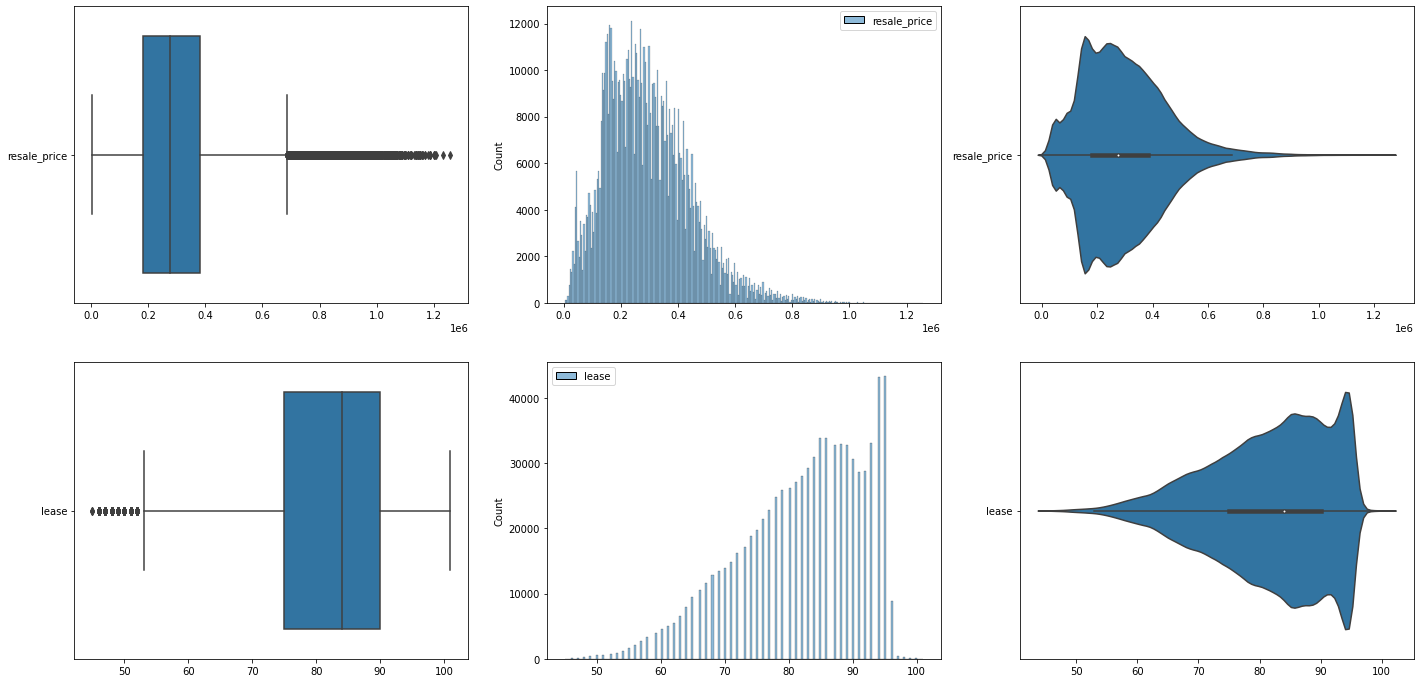

In [7]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = rsp, orient = "h", ax = axes[0,0])
sb.histplot(data = rsp, ax = axes[0,1])
sb.violinplot(data = rsp, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = lease, orient = "h", ax = axes[1,0])
sb.histplot(data = lease, ax = axes[1,1])
sb.violinplot(data = lease, orient = "h", ax = axes[1,2])

In [8]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([rsp, lease], axis = 1).reindex(rsp.index)
jointDF

,resale_price,lease
0,255000.0,70
1,275000.0,65
2,285000.0,64
3,290000.0,63
4,290000.0,64
...,...,...
826576,580000.0,73
826577,540000.0,73
826578,738000.0,77
826579,592000.0,70


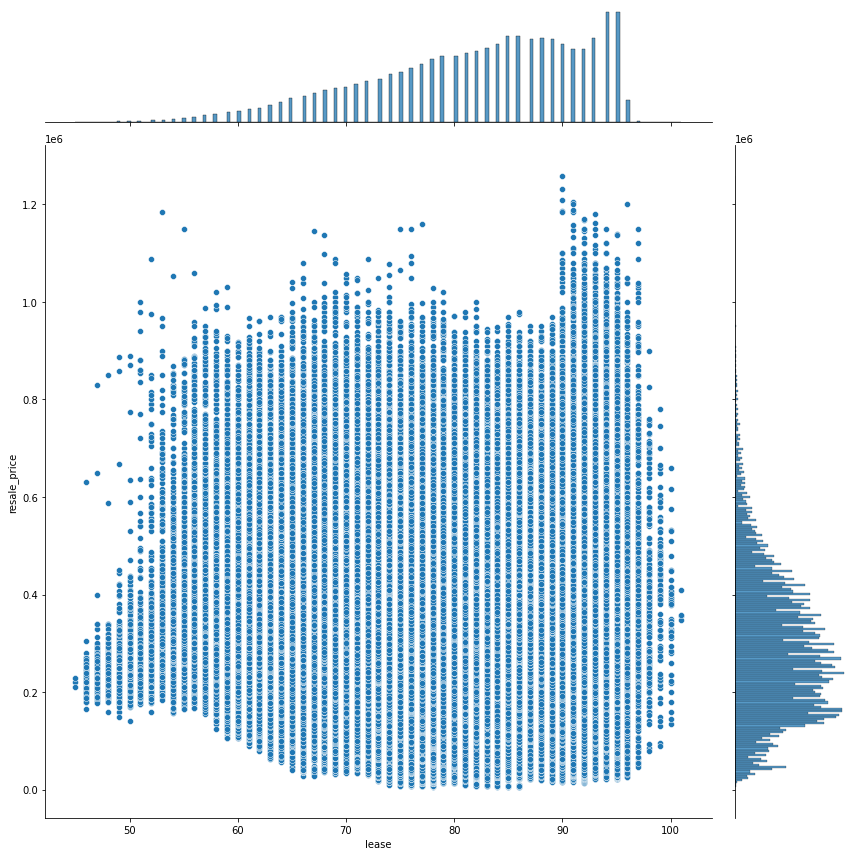

In [9]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "lease", y = "resale_price", height = 12)

<AxesSubplot:>

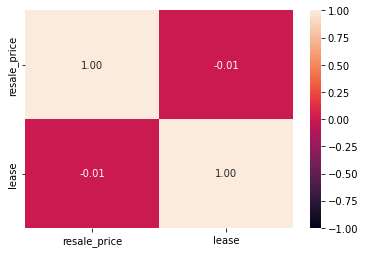

In [10]:
# Calculate the correlation between the two columns/variables
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [11]:
rsp.info

<bound method DataFrame.info of         resale_price
0           255000.0
1           275000.0
2           285000.0
3           290000.0
4           290000.0
...              ...
826576      580000.0
826577      540000.0
826578      738000.0
826579      592000.0
826580      545000.0

[826581 rows x 1 columns]>